## Données TousAntiCovid

Récupérer les commentaires sur l'application (et éventuellement d'autres données)

Objectif : compléter des données issues d'une enquête passée sur les usages réels (HLS/SLAVACO)

In [38]:
import pandas as pd
from google_play_scraper import app
import numpy as np
import matplotlib.pyplot as plt
import json
#pip install google-play-scraper

## Commentaires google play

Page de tousanticovid : https://play.google.com/store/apps/details?id=fr.gouv.android.stopcovid&hl=en&gl=US&showAllReviews=true

Tutorial de scrapping : https://www.linkedin.com/pulse/how-scrape-google-play-reviews-4-simple-steps-using-python-kundi/

In [40]:
result = app(
    'fr.gouv.android.stopcovid',
    lang='fr', # defaults to 'en'
    country='fr' # defaults to 'us'
)
#print(json.dumps(result, indent=4, sort_keys=True))

### Collecte des données

In [4]:
from google_play_scraper import Sort, reviews_all

fr_reviews = reviews_all(
    'fr.gouv.android.stopcovid',
    sleep_milliseconds=0, # defaults to 0
    lang='fr', # defaults to 'en'
    country='fr', # defaults to 'us'
    sort=Sort.NEWEST, # defaults to Sort.MOST_RELEVANT
)

In [15]:
len(fr_reviews)

52823

Mise en forme d'un tableau

In [13]:
df = pd.DataFrame(np.array(fr_reviews),columns=['review'])
df = df.join(pd.DataFrame(df.pop('review').tolist()))
df = df.set_index("at")
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,gp:AOqpTOHAZSNGPEDJXvfQXwmrmUpM6qVkMnM-P9Cfiq_...,Sandrine Despalles,https://play-lh.googleusercontent.com/a/AATXAJ...,"La mise à jour ne se faisant pas, j'ai tenté d...",1,0,None,2021-12-30 11:25:30,None,NaT
1,gp:AOqpTOFTMOpRViNZ5h4MBCRhfYvxLu5KSMj0Q2HWxuy...,Didier Blanchard,https://play-lh.googleusercontent.com/a/AATXAJ...,Très bon outil,5,0,4.0.3,2021-12-30 11:21:29,None,NaT
2,gp:AOqpTOF_HEMACj2LFKV46j1WEHVYKJ9PY2qC0wnT-zI...,Helene Briland,https://play-lh.googleusercontent.com/a/AATXAJ...,Bien sauf que votre déclaration cas contact tr...,3,0,4.0.3,2021-12-30 11:20:34,None,NaT
3,gp:AOqpTOHifbi3z6frjnTnR0uIGfj5Y9fOAiZflg2IjKK...,James Rubert,https://play-lh.googleusercontent.com/a/AATXAJ...,C'est bien,5,0,4.0.3,2021-12-30 11:20:32,None,NaT
4,gp:AOqpTOGq_rKCWqmgUl1SbZQZ_YaCWP7kjXgOMCY4r3U...,Bruno Bagan,https://play-lh.googleusercontent.com/a/AATXAJ...,Efficace et rapide,5,0,3.8.4,2021-12-30 11:19:41,None,NaT


In [14]:
# Sauvegarder le scrapping
df.to_excel("df_google_play_301221.xls")

### Production d'un graphique

Text(0.5, 1.0, 'Évolution des commentaires sur TousAntiCovid sur Google Play')

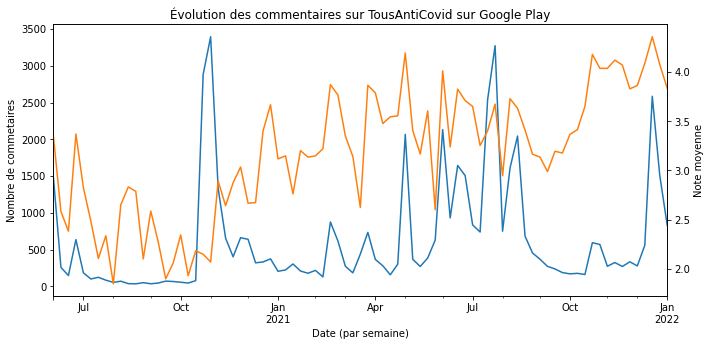

In [33]:
fig,ax = plt.subplots(figsize=(11,5))

df.resample("w")["score"].count().plot(ax=ax,label="Nombre de commentaires")
df.resample("w")["score"].mean().plot(secondary_y=True,ax=ax,label="Note moyenne sur la semaine")

ax.set_ylabel('Nombre de commetaires')
ax.right_ax.set_ylabel('Note moyenne')
ax.set_xlabel("Date (par semaine)")
plt.title("Évolution des commentaires sur TousAntiCovid sur Google Play")

### La même, avec apple

In [49]:
from app_store_scraper import AppStore
tousanticovid = AppStore(country="en", app_name="tousanticovid",app_id=1511279125)
tousanticovid.review(how_many=100)

2021-12-30 11:59:12,784 [INFO] Base - Initialised: AppStore('en', 'tousanticovid', 1511279125)
2021-12-30 11:59:12,785 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/en/app/tousanticovid/id1511279125
2021-12-30 11:59:13,021 [ERROR] Base - Something went wrong: 'data'
2021-12-30 11:59:13,022 [INFO] Base - [id:1511279125] Fetched 0 reviews (0 fetched in total)


-> La bibliothèque semble ne plus être maintenue ... dommage

### Analyse des commentaires

à faire ...